In [1038]:
import anndata as ad
import numpy as np
import os
import pandas as pd
import scanpy as sc

# Rebuild Adamson 2016 datasets using original files from GEO submission
source: https://ftp.ncbi.nlm.nih.gov/geo/series/GSE90nnn/GSE90546/suppl/GSE90546_RAW.tar

In [1039]:
os.chdir('/work/moccir/data/perturbseq_benchmark_data/adamson_upr_2016')

# Pilot study

## mtx file

In [1040]:
# could probably use Scanpy's read_10x_mtx function but build it manually piece by piece instead
# .mtx file from GEO has a .txt extension but this will not cause any issues
pilot_adata = ad.read_mtx('GSM2406675_10X001_matrix.mtx.txt')
pilot_adata

AnnData object with n_obs × n_vars = 35635 × 5768

#### Matrix is currently genes (as observations) by cells (as variables), but we want cells as observations so transpose

In [1041]:
pilot_adata = pilot_adata.T

## genes

In [1042]:
pilot_genes = pd.read_csv('GSM2406675_10X001_genes.tsv', sep='\t', names=['ensembl_id', 'gene_symbol'])
pilot_genes

,ensembl_id,gene_symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
35630,ENSG00000212907,MT-ND4L
35631,ENSG00000198886,MT-ND4
35632,ENSG00000198786,MT-ND5
35633,ENSG00000198695,MT-ND6


## cell barcodes

In [1043]:
pilot_barcodes = pd.read_csv('GSM2406675_10X001_barcodes.tsv', sep='\t', header=None, index_col=0)
pilot_barcodes.index.name = 'barcode'
pilot_barcodes

""
barcode
AAACATACACCGAT-1
AAACATACAGAGAT-1
AAACATACCAGAAA-1
AAACATACGTTGAC-1
AAACATACTGTTCT-1
...
TTTGACTGGAAGGC-1
TTTGACTGGACGAG-1
TTTGCATGCCCGTT-1


### add obs_names and var_names

In [1044]:
pilot_adata.obs_names = pilot_barcodes.index
pilot_adata.var_names = pilot_genes.index

### prepare cell identities data and add 'condition' column

In [1045]:
pilot_cell_identities = pd.read_csv('GSM2406675_10X001_cell_identities.csv', index_col=0)
pilot_cell_identities.index.name = 'barcode'
pilot_cell_identities.columns = [col.replace(' ', '_') for col in pilot_cell_identities.columns]
pilot_cell_identities

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells
barcode,,,,,,
GTGTCAGATCGTTT-1,62(mod)_pBA581,10831,633,17.110585,True,1
CTACTCCTCTCCAC-1,EP300_pDS268,9277,466,19.907725,True,1
TTCTTACTCTGAAC-1,EP300_pDS268,7426,437,16.993135,True,1
CAGCCTTGATGACC-1,62(mod)_pBA581,5979,314,19.041401,True,2
CAGTTGGAAATGCC-1,BHLHE40_pDS258,5661,286,19.793706,True,1
...,...,...,...,...,...,...
AGATCGTGCTGATG-1,62(mod)_pBA581,14,13,1.076923,False,0
AGAGTCACCAGAAA-1,SPI1_pDS255,13,1,13.000000,False,0
TAAGAACTTCTCTA-1,SNAI1_pDS266,12,1,12.000000,False,0


In [1046]:
pilot_cell_identities['condition'] = pilot_cell_identities['guide_identity'].apply(lambda s: s.split('_')[0])
pilot_cell_identities['condition'] = pilot_cell_identities['condition'].replace('62(mod)', 'control')
pilot_cell_identities['condition'] = pilot_cell_identities['condition'].replace('63(mod)', 'control')
pilot_cell_identities

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
GTGTCAGATCGTTT-1,62(mod)_pBA581,10831,633,17.110585,True,1,control
CTACTCCTCTCCAC-1,EP300_pDS268,9277,466,19.907725,True,1,EP300
TTCTTACTCTGAAC-1,EP300_pDS268,7426,437,16.993135,True,1,EP300
CAGCCTTGATGACC-1,62(mod)_pBA581,5979,314,19.041401,True,2,control
CAGTTGGAAATGCC-1,BHLHE40_pDS258,5661,286,19.793706,True,1,BHLHE40
...,...,...,...,...,...,...,...
AGATCGTGCTGATG-1,62(mod)_pBA581,14,13,1.076923,False,0,control
AGAGTCACCAGAAA-1,SPI1_pDS255,13,1,13.000000,False,0,SPI1
TAAGAACTTCTCTA-1,SNAI1_pDS266,12,1,12.000000,False,0,SNAI1


### some rows in mtx file do not have entries in cell identities -- create rows with missing information for these so that it can be added to .obs without removing cells

In [1047]:
pilot_cell_identities_list = pilot_cell_identities.index.tolist()
pilot_missing_barcodes = [x for x in pilot_adata.obs_names if x not in pilot_cell_identities_list]
len(pilot_missing_barcodes)

10

In [1048]:
pilot_missing_obs = pd.DataFrame({
    'guide_identity': None,
    'read_count': np.nan,
    'UMI_count': np.nan,
    'coverage': np.nan,
    'good_coverage': False,
    'number_of_cells': np.nan,
    'condition': np.nan
}, index=pilot_missing_barcodes)

### add .obs and .var

In [1049]:
new_pilot_obs = pd.concat([pilot_cell_identities, pilot_missing_obs])
new_pilot_obs

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
GTGTCAGATCGTTT-1,62(mod)_pBA581,10831.0,633.0,17.110585,True,1.0,control
CTACTCCTCTCCAC-1,EP300_pDS268,9277.0,466.0,19.907725,True,1.0,EP300
TTCTTACTCTGAAC-1,EP300_pDS268,7426.0,437.0,16.993135,True,1.0,EP300
CAGCCTTGATGACC-1,62(mod)_pBA581,5979.0,314.0,19.041401,True,2.0,control
CAGTTGGAAATGCC-1,BHLHE40_pDS258,5661.0,286.0,19.793706,True,1.0,BHLHE40
...,...,...,...,...,...,...,...
GAATTAACTAACGC-1,None,NaN,NaN,NaN,False,NaN,NaN
GTGATTCTAACAGA-1,None,NaN,NaN,NaN,False,NaN,NaN
TAGCCCTGAGCCTA-1,None,NaN,NaN,NaN,False,NaN,NaN
TCTAACACTCTTCA-1,None,NaN,NaN,NaN,False,NaN,NaN


#### To ensure that the new .obs is in the correct order to match the entries in .X, need to reorded it by existing .obs index in the AnnData object that has been created prior to substituting it in.

In [1050]:
new_pilot_obs = new_pilot_obs.reindex(pilot_adata.obs.index)
pilot_adata.obs = new_pilot_obs

In [1051]:
pilot_adata.obs

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
AAACATACACCGAT-1,CREB1_pDS269,1286.0,98.0,13.122449,True,1.0,CREB1
AAACATACAGAGAT-1,SNAI1_pDS266,296.0,19.0,15.578947,True,1.0,SNAI1
AAACATACCAGAAA-1,62(mod)_pBA581,1829.0,162.0,11.290123,True,1.0,control
AAACATACGTTGAC-1,EP300_pDS268,1580.0,98.0,16.122449,True,1.0,EP300
AAACATACTGTTCT-1,62(mod)_pBA581,748.0,51.0,14.666667,True,1.0,control
...,...,...,...,...,...,...,...
TTTGACTGGAAGGC-1,SNAI1_pDS266,331.0,22.0,15.045455,True,1.0,SNAI1
TTTGACTGGACGAG-1,SNAI1_pDS266,745.0,35.0,21.285714,True,1.0,SNAI1
TTTGCATGCCCGTT-1,SNAI1_pDS266,784.0,37.0,21.189189,True,1.0,SNAI1


In [1052]:
pilot_adata.var = pilot_genes

In [1053]:
pilot_adata.var

,ensembl_id,gene_symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
35630,ENSG00000212907,MT-ND4L
35631,ENSG00000198886,MT-ND4
35632,ENSG00000198786,MT-ND5
35633,ENSG00000198695,MT-ND6


## add basic QC metrics

In [1054]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
pilot_adata.var["mt"] = pilot_adata.var['gene_symbol'].str.startswith("MT-")
# ribosomal genes
pilot_adata.var["ribo"] = pilot_adata.var['gene_symbol'].str.startswith(("RPS", "RPL"))
# hemoglobin genes
pilot_adata.var["hb"] = pilot_adata.var['gene_symbol'].str.contains("^HB[^(P)]")

In [1055]:
sc.pp.calculate_qc_metrics(
    pilot_adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [1056]:
pilot_adata.obs

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb
barcode,,,,,,,,,,,,,,,,,,,,,
AAACATACACCGAT-1,CREB1_pDS269,1286.0,98.0,13.122449,True,1.0,CREB1,2412,7.788626,8138.0,...,68.849840,0.0,0.0,0.0,2770.0,7.926963,34.037846,53.0,3.988984,0.651266
AAACATACAGAGAT-1,SNAI1_pDS266,296.0,19.0,15.578947,True,1.0,SNAI1,2386,7.777793,8980.0,...,72.928731,0.0,0.0,0.0,3593.0,8.187021,40.011135,121.0,4.804021,1.347439
AAACATACCAGAAA-1,62(mod)_pBA581,1829.0,162.0,11.290123,True,1.0,control,4404,8.390496,28610.0,...,71.338693,0.0,0.0,0.0,11445.0,9.345396,40.003498,470.0,6.154858,1.642782
AAACATACGTTGAC-1,EP300_pDS268,1580.0,98.0,16.122449,True,1.0,EP300,2815,7.943073,11346.0,...,69.504671,0.0,0.0,0.0,3992.0,8.292298,35.184204,53.0,3.988984,0.467125
AAACATACTGTTCT-1,62(mod)_pBA581,748.0,51.0,14.666667,True,1.0,control,2584,7.857481,9864.0,...,71.208435,0.0,0.0,0.0,3533.0,8.170186,35.817112,141.0,4.955827,1.429440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTGGAAGGC-1,SNAI1_pDS266,331.0,22.0,15.045455,True,1.0,SNAI1,1856,7.526718,5942.0,...,72.887917,0.0,0.0,0.0,1878.0,7.538495,31.605520,128.0,4.859812,2.154157
TTTGACTGGACGAG-1,SNAI1_pDS266,745.0,35.0,21.285714,True,1.0,SNAI1,2263,7.724888,8150.0,...,72.613497,0.0,0.0,0.0,2999.0,8.006368,36.797546,105.0,4.663439,1.288344
TTTGCATGCCCGTT-1,SNAI1_pDS266,784.0,37.0,21.189189,True,1.0,SNAI1,2473,7.813592,9179.0,...,71.227803,0.0,0.0,0.0,3408.0,8.134174,37.128227,110.0,4.709530,1.198388


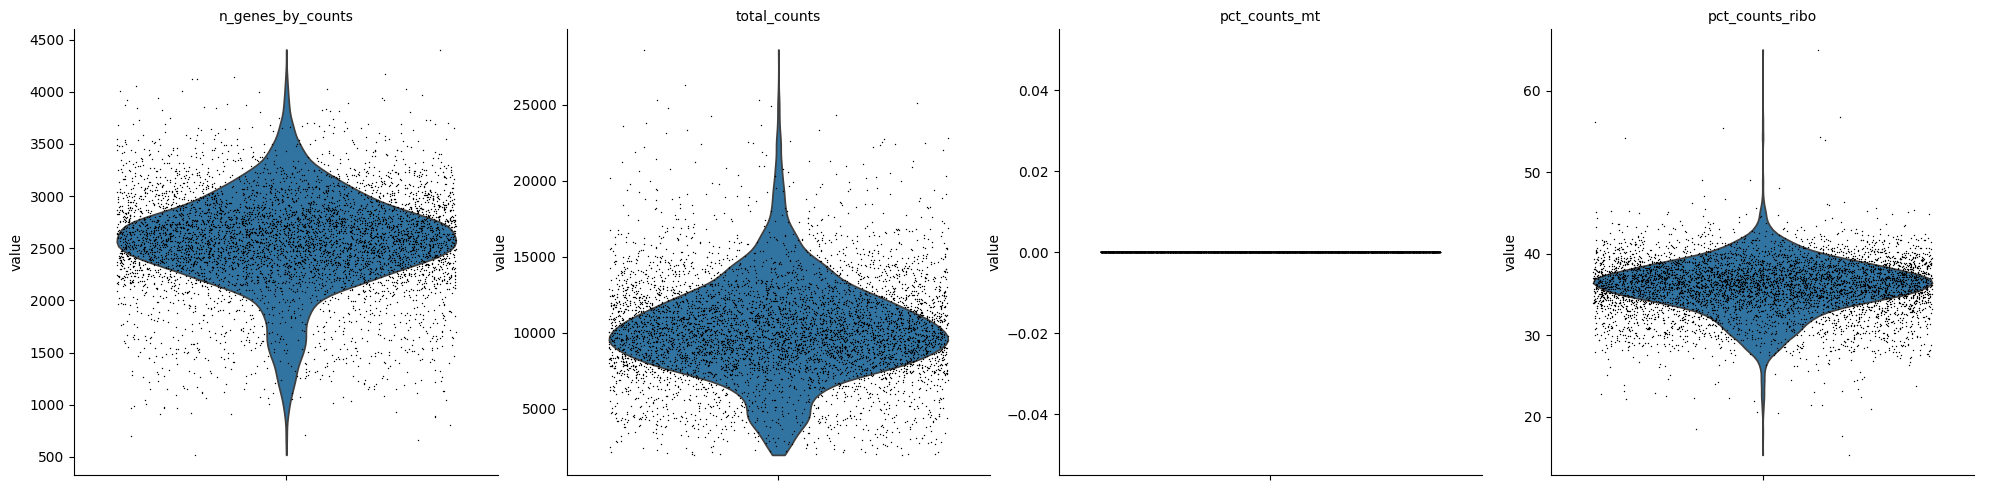

In [1057]:
sc.pl.violin(
    pilot_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)

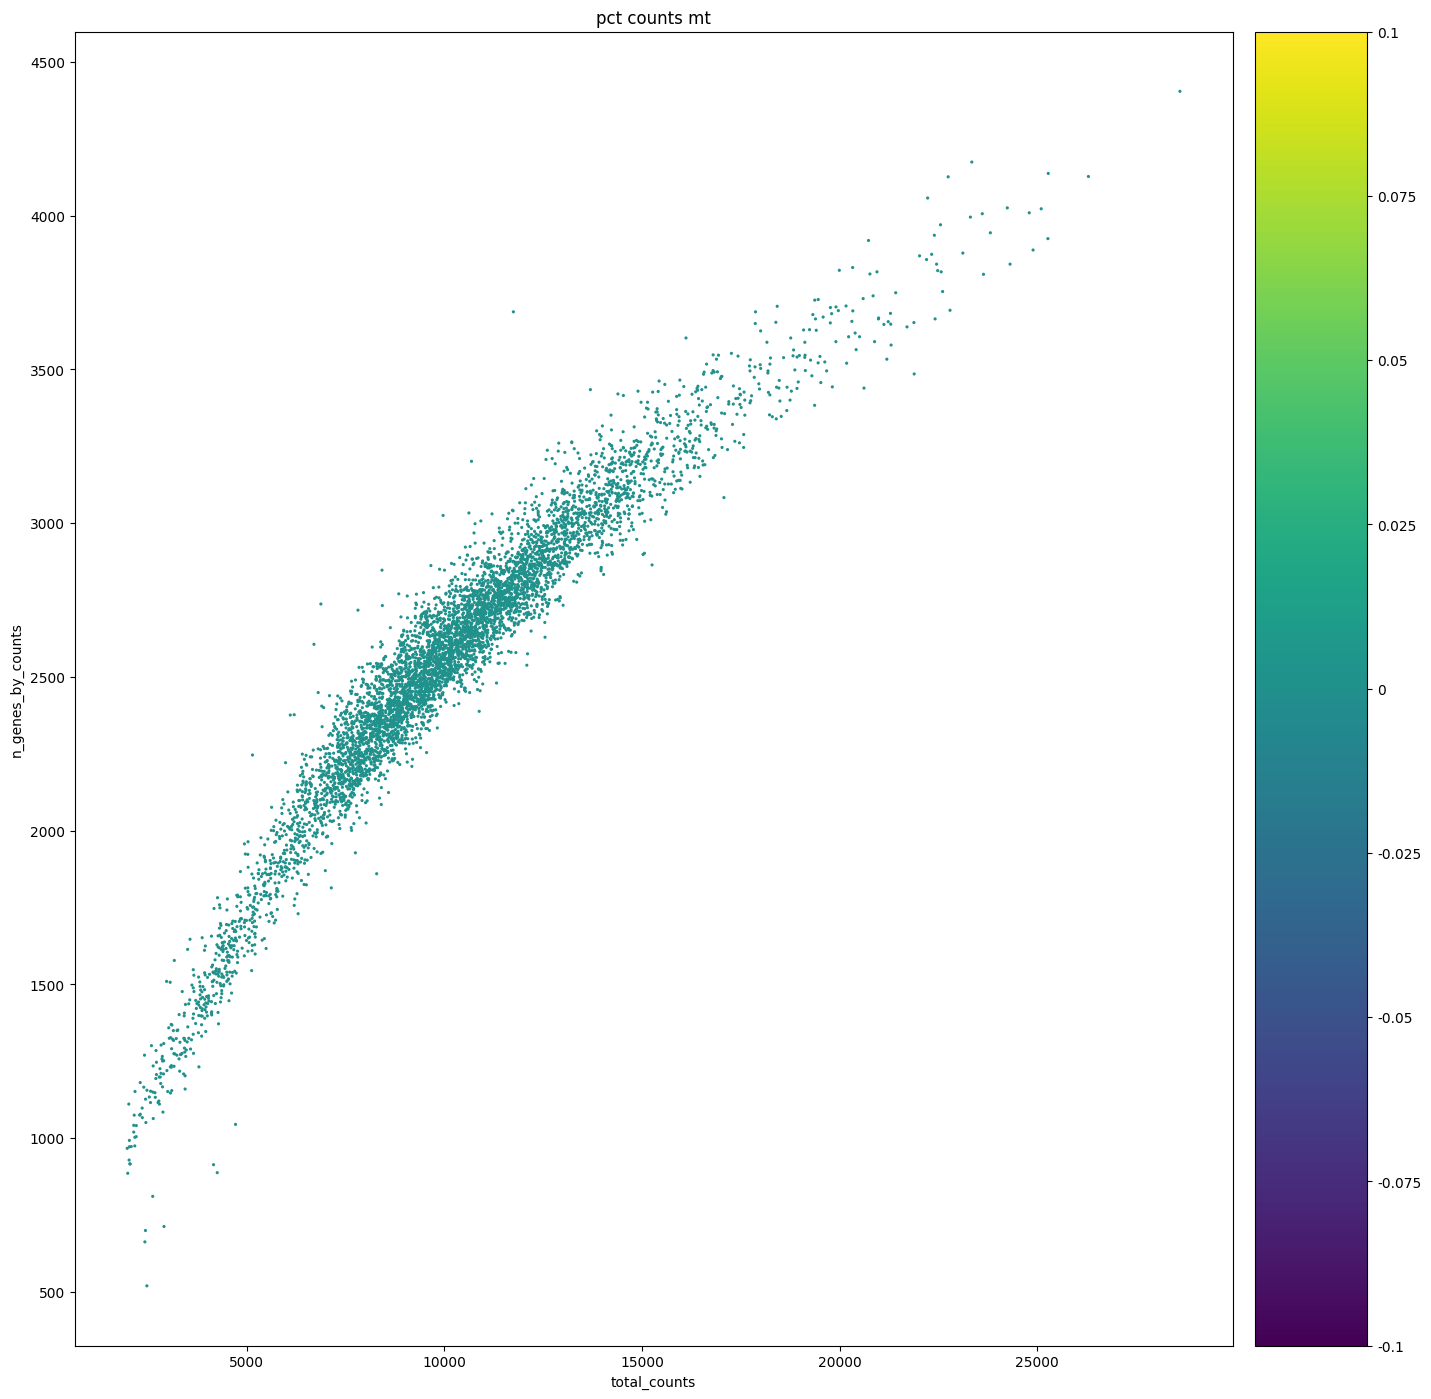

In [1058]:
sc.pl.scatter(pilot_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

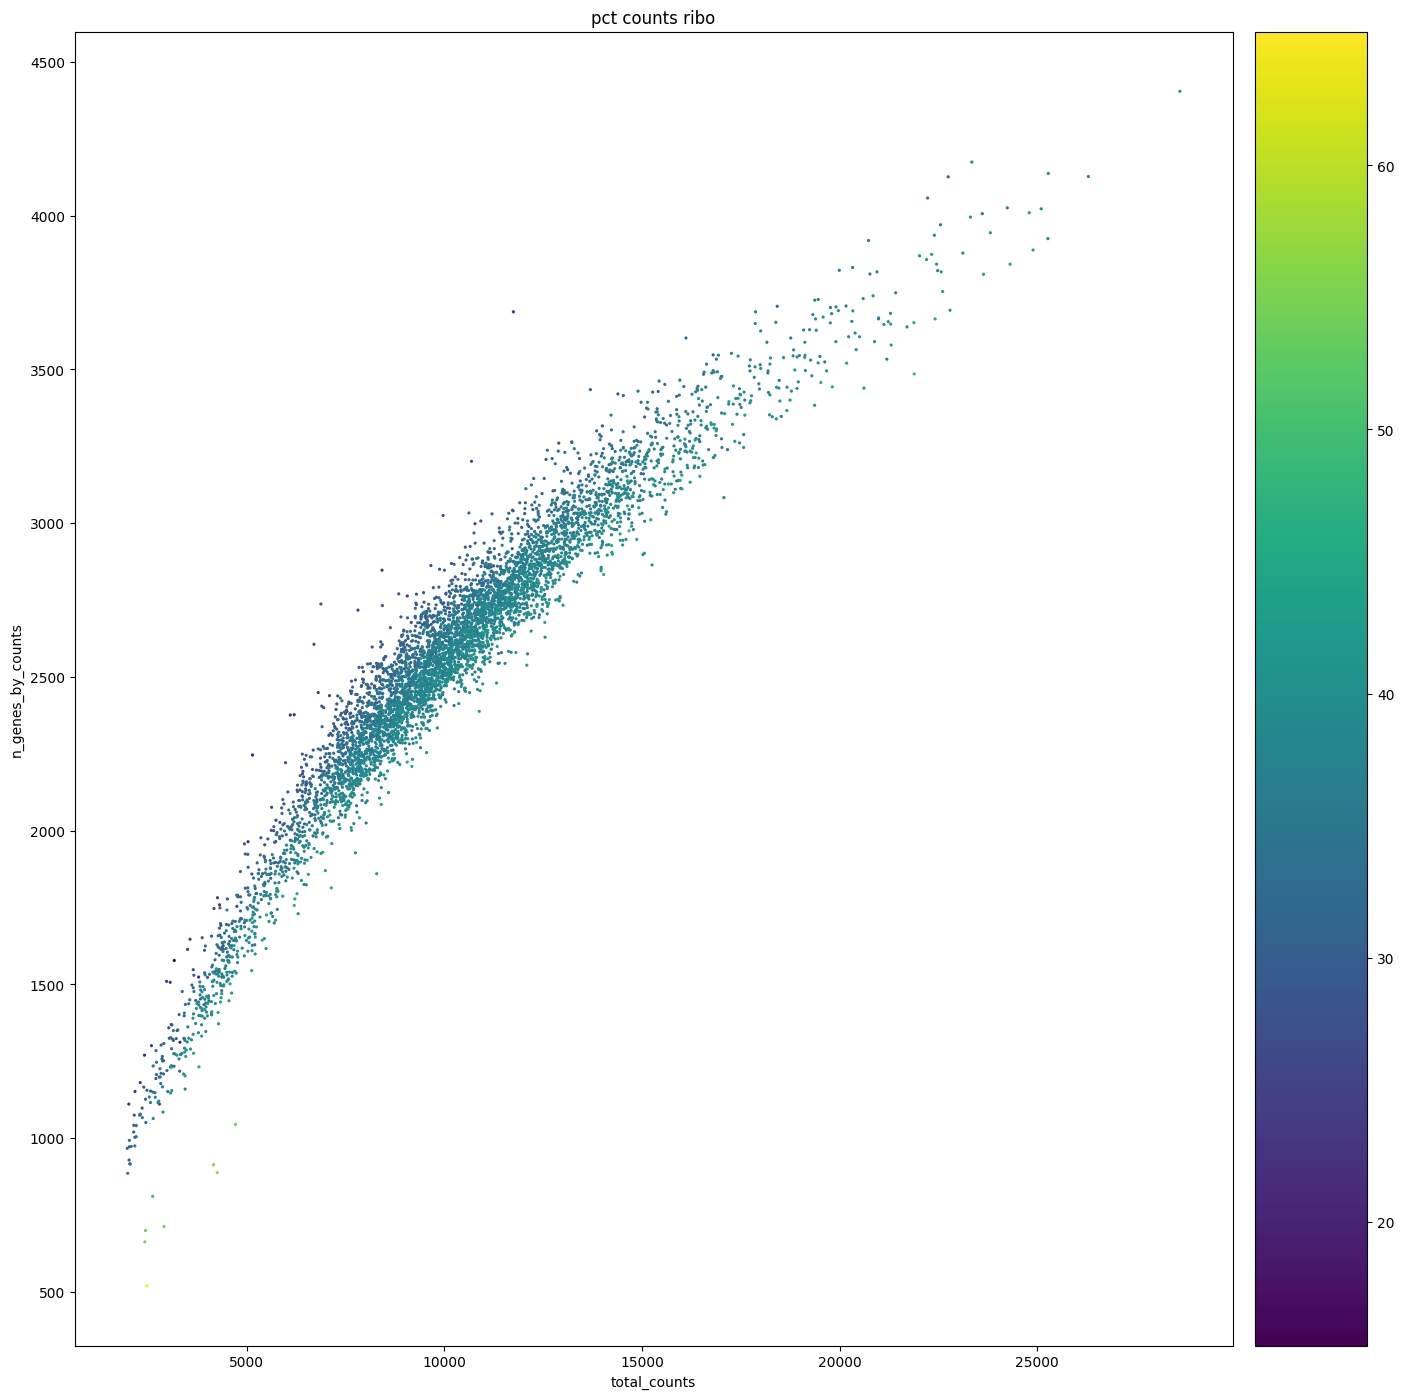

In [1059]:
sc.pl.scatter(pilot_adata, "total_counts", "n_genes_by_counts", color="pct_counts_ribo")

In [1060]:
pilot_adata

AnnData object with n_obs × n_vars = 5768 × 35635
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'good_coverage', 'number_of_cells', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'ensembl_id', 'gene_symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [1061]:
pilot_adata.obs['condition'].value_counts()

condition
control    1769
SPI1        696
EP300       632
SNAI1       562
ZNF326      557
BHLHE40     553
CREB1       506
DDIT3       477
*             6
Name: count, dtype: int64

In [1062]:
pilot_adata.write('adamson_2016_pilot_from_source.h5ad')